In [1]:
import numpy as np

from scipy.interpolate import interp1d

from matplotlib import pyplot as plt

In [2]:
klin, plin = np.loadtxt('desi_pk.txt', unpack=True)

In [8]:
klin

array([1.00000000e-03, 1.00461810e-03, 1.00925754e-03, ...,
       9.90827380e+00, 9.95403124e+00, 1.00000000e+01])

In [3]:
dats = np.loadtxt('DESI_Pk_template.dat')

pnw = interp1d(dats[:,0], dats[:,1], kind='cubic', bounds_error=False, fill_value=0)(klin)

(0.0, 0.5)

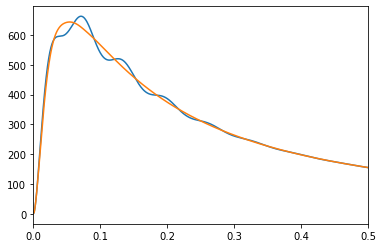

In [4]:
plt.plot(klin, klin * plin)
plt.plot(klin, klin * pnw)

plt.xlim(0,0.5)

In [5]:
pnw

array([3780.67845442, 3796.86713292, 3813.14203294, ...,    0.        ,
          0.        ,    0.        ])

In [10]:
iis = (pnw > 0)

pnw[~iis] = plin[~iis]
np.savetxt('desi_plin_template.txt', np.array([klin, plin]).T)
np.savetxt('desi_pnw_template.txt', np.array([klin, pnw]).T)

#np.savetxt('desi_plin_template.txt', np.array([klin[iis], plin[iis]]).T)
#np.savetxt('desi_pnw_template.txt', np.array([klin[iis], pnw[iis]]).T)

(0.0, 10.0)

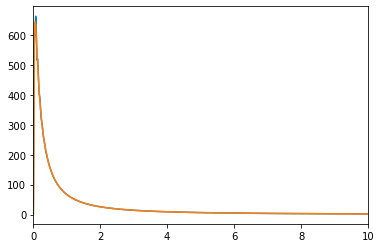

In [11]:
plt.plot(klin, klin * plin)
plt.plot(klin, klin * pnw)

plt.xlim(0,10)

/tmp/ipykernel_16750/1966727375.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(klin, plin/pnw - 1)


(-0.01, 0.01)

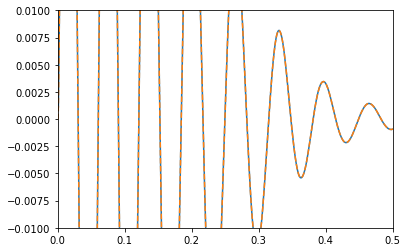

In [7]:
plt.plot(klin, plin/pnw - 1)
plt.plot(dats[:,0], dats[:,2], '--')

plt.xlim(0,0.5)

plt.ylim(-0.01, 0.01)